In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r'C:\Users\rohit\Desktop\Machine Learning\Zomato_Bangalore\zomato.csv')

In [3]:
df = df1.copy()

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning

REMOVING UNWANTED COLUMNS

In [5]:
df.shape

(51717, 17)

In [6]:
df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'],axis = 1,inplace = True)

In [7]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
df = df.drop_duplicates()
df.shape

(51609, 11)

WORKING ON NULL COLUMNS

In [9]:
df.drop(['listed_in(city)'],axis = 1,inplace = True)

In [10]:
def handlerate(value):
    if (value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)

In [11]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [12]:
df['rate'].fillna(round(df['rate'].mean(),2),inplace = True)

In [13]:
df.dropna(inplace = True)

In [14]:
df.rename(columns = {'approx_cost(for two people)':'cost2plates','listed_in(type)':'type'},inplace = True)

Removing ',' from cost2plates column

In [15]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)


df['cost2plates'] = df['cost2plates'].apply(handlecomma)

Making as others to the columns rest_type, location and cuisines where count is so less.

In [16]:
rest_type = df['rest_type'].value_counts()
rest_type_1000 = rest_type[rest_type < 1000]

def rest_type(value):
    if value in rest_type_1000:
        return 'others'
    else:
        return value
    
df['rest_type'] = df['rest_type'].apply(rest_type)

In [17]:
location = df['location'].value_counts()
location_300 = location[location < 300]

def location(value):
    if value in location_300:
        return 'others'
    else:
        return value
    
df['location'] = df['location'].apply(location)

In [18]:
cuisines = df['cuisines'].value_counts(ascending  = False)
cuisines_100 = cuisines[cuisines<100]

def cuisines(value):
    if(value in cuisines_100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(cuisines)

In [19]:
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

# Visualization

Count Plot of Various Locations

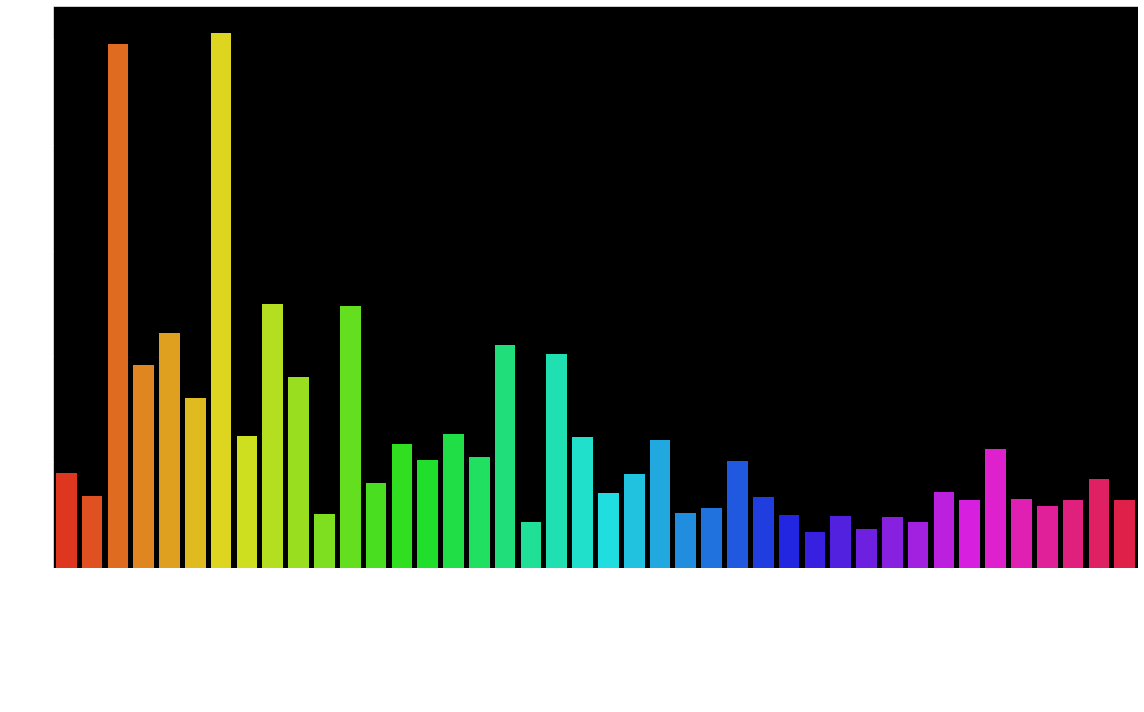

In [20]:
unique_locs = df['location'].nunique()
colors = sns.color_palette('hsv', unique_locs)

plt.figure(figsize=(16, 10))
ax = sns.countplot(data=df, x='location', palette=colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Visualizing Online Order

<Axes: xlabel='count', ylabel='online_order'>

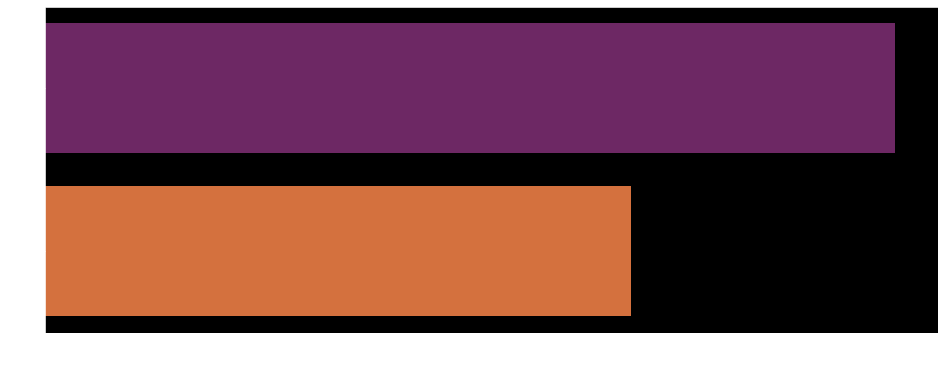

In [21]:
plt.figure(figsize = (16,6))
sns.countplot(df['online_order'], palette = 'inferno')

Visualizing Book Table

<Axes: xlabel='count', ylabel='book_table'>

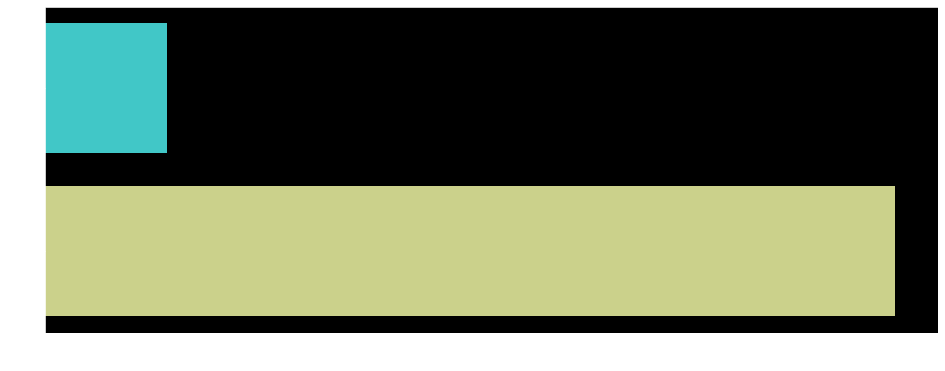

In [22]:
plt.figure(figsize = (16,6))
sns.countplot(df['book_table'], palette = 'rainbow')

Visualizing Online Order vs Rate

<Axes: xlabel='online_order', ylabel='rate'>

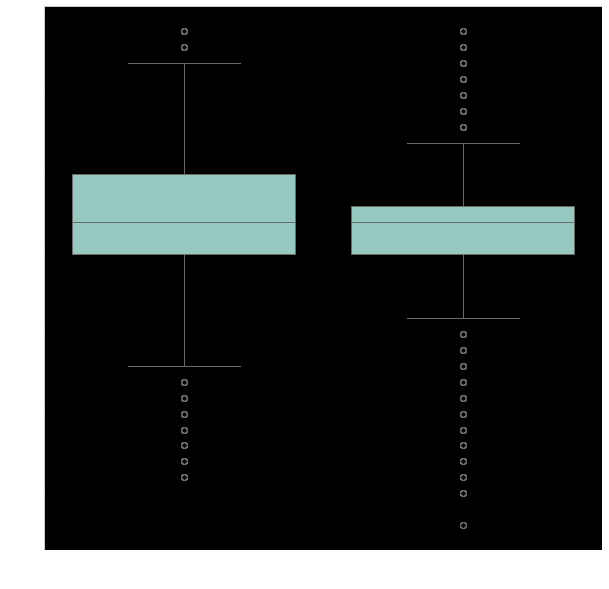

In [23]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

Visualizing Book Table vs Rate

<Axes: xlabel='book_table', ylabel='rate'>

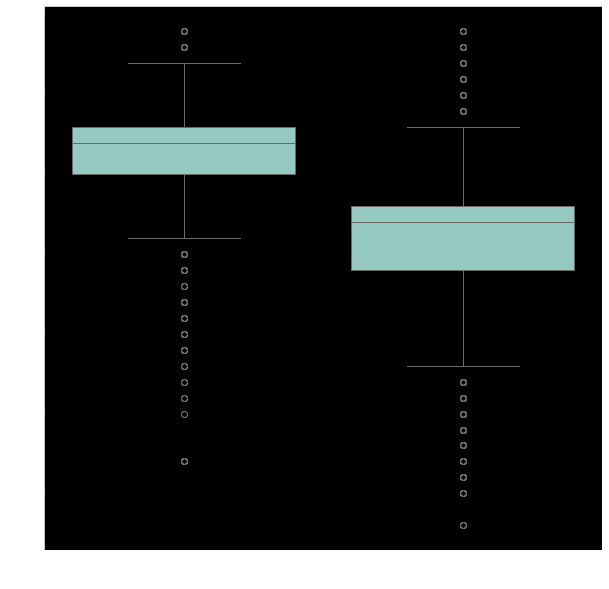

In [24]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

Visualizing Online Order Facility, Location Wise

In [25]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

<Axes: xlabel='location'>

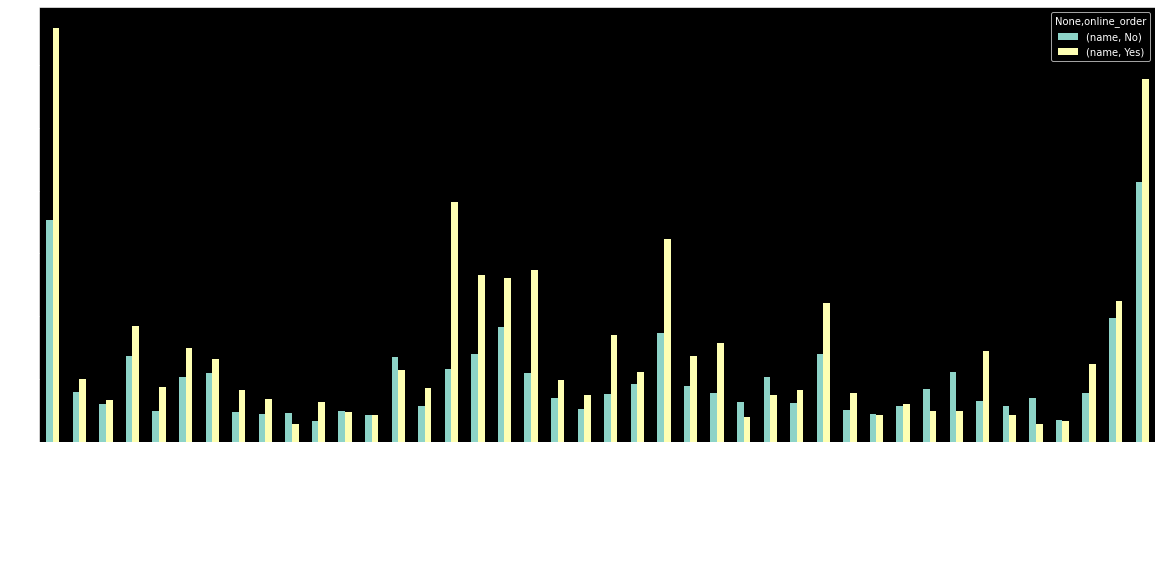

In [26]:
df1.plot(kind = 'bar', figsize = (20,8))

Visualizing Book Table Facility, Location Wise

In [27]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<Axes: xlabel='location'>

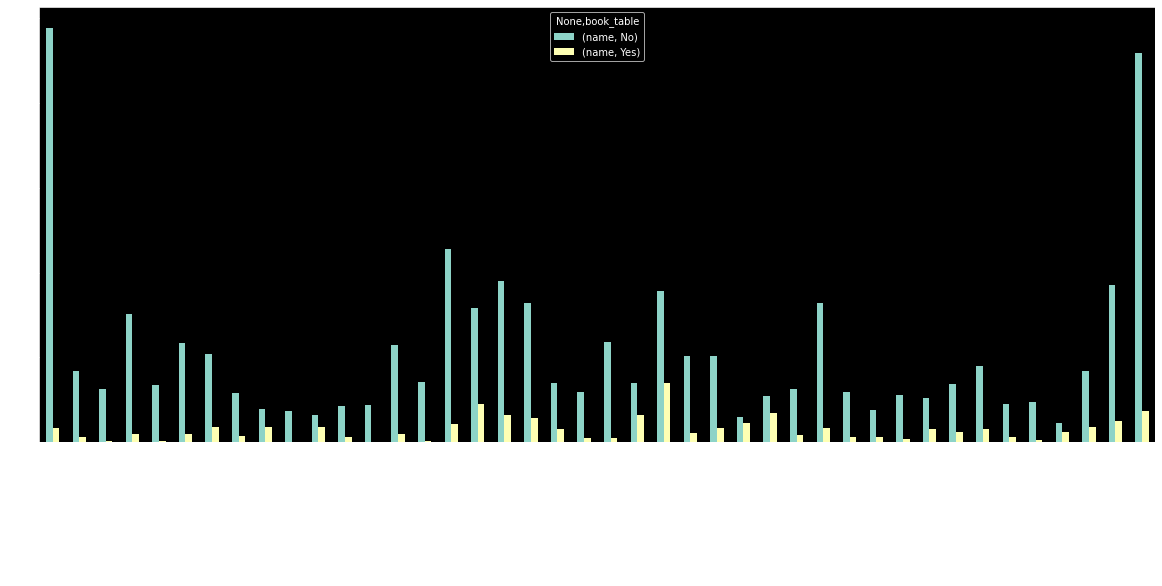

In [28]:
df2.plot(kind = 'bar', figsize = (20,8))

Visualizing Types of Restaurents vs Rate

<Axes: xlabel='type', ylabel='rate'>

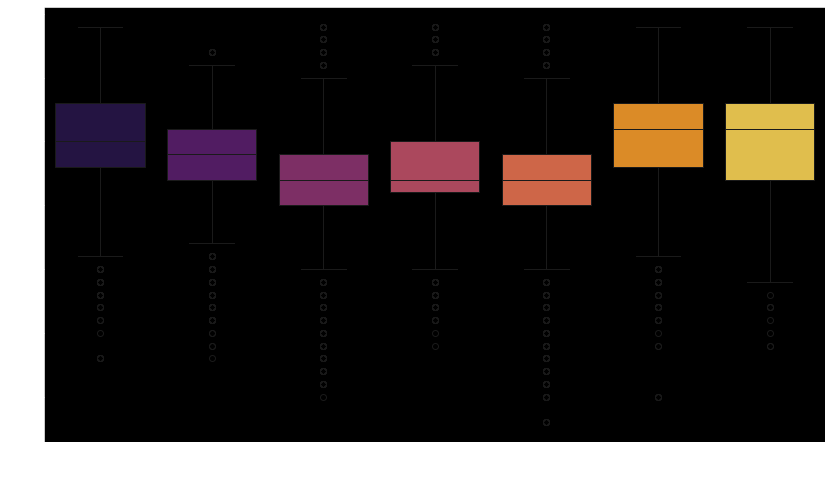

In [29]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'inferno')

Grouping Types of Restaurents, location wise

In [30]:
df3 = df.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3 = pd.read_csv('location_type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

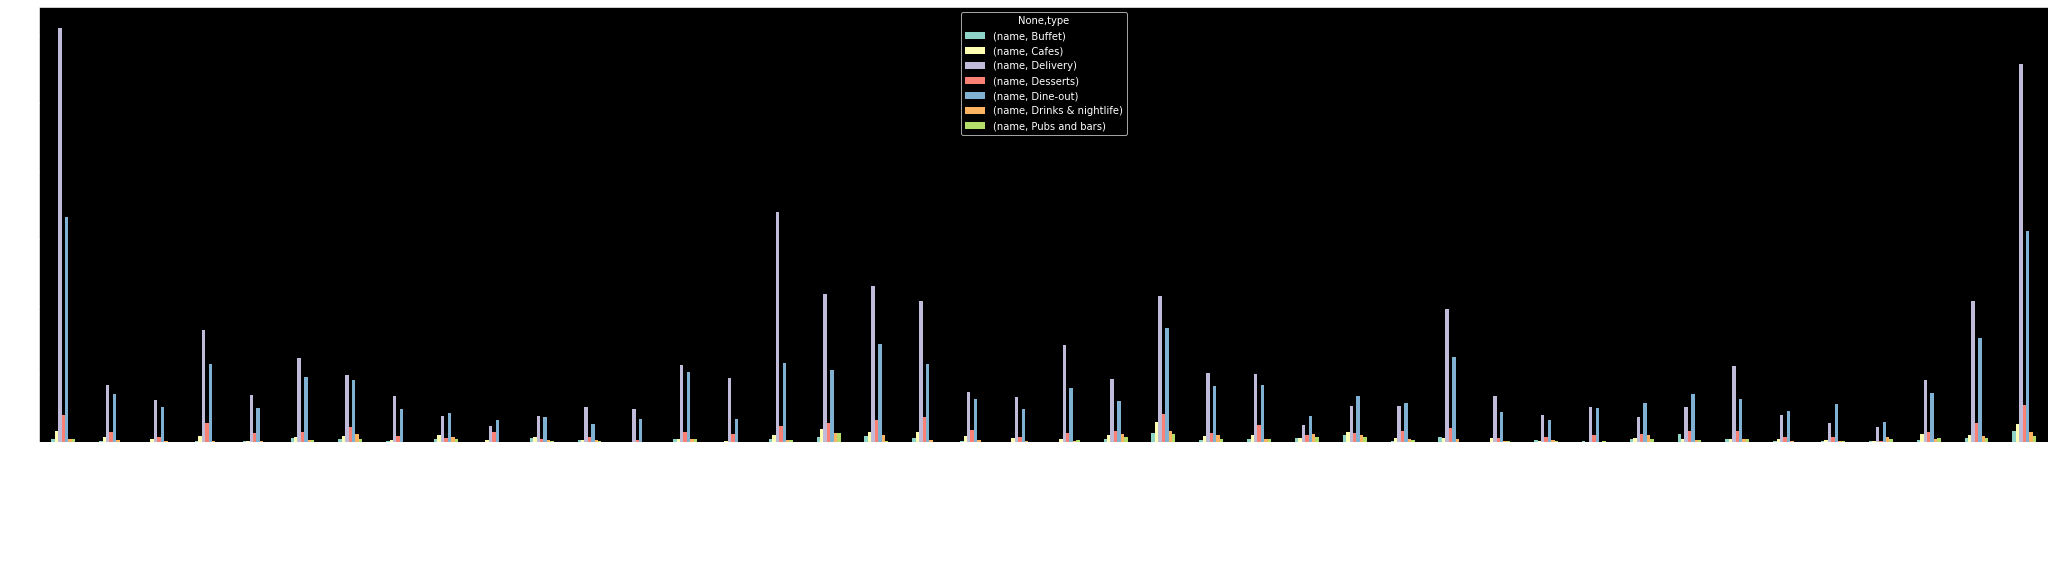

In [31]:
df3.plot(kind = 'bar', figsize = (36,8))

No. of Votes, Location Wise

In [32]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


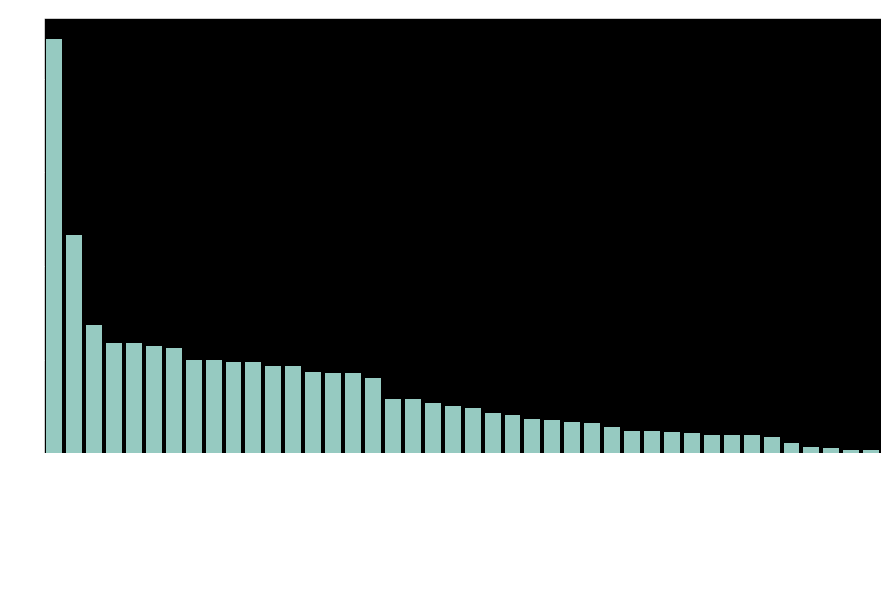

In [33]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)
plt.show()

Visualizing Top Cuisines

In [34]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [35]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


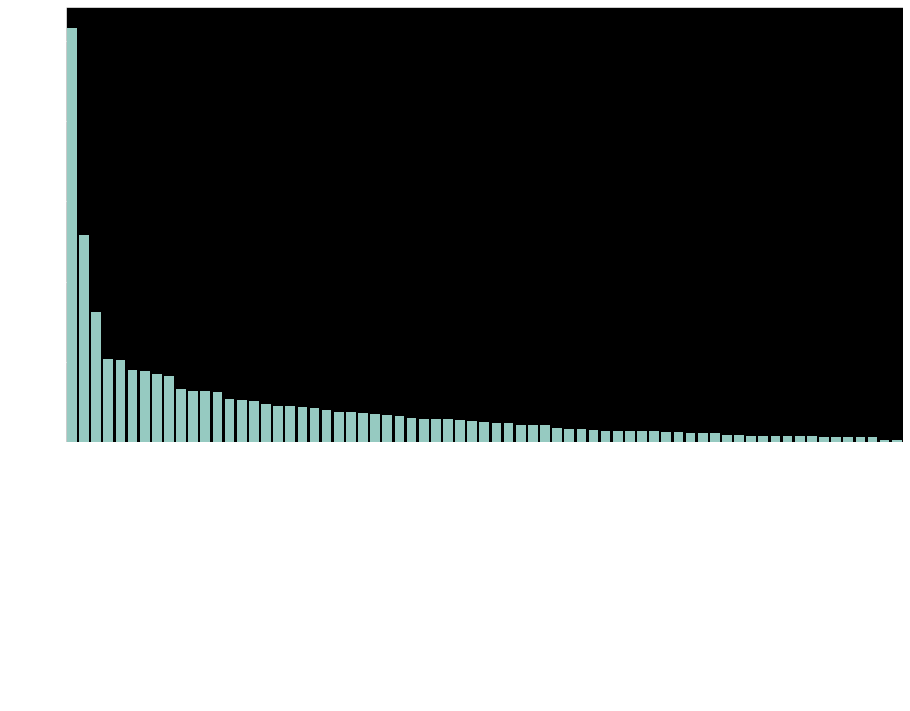

In [36]:
plt.figure(figsize = (15,8))
sns.barplot(x = df7.index , y = df7['votes'])
plt.xticks(rotation = 90)
plt.show()

# Thank you